In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-08-14 10:51:24.632369: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-14 10:51:24.667679: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-14 10:51:25.170713: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados 

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/RJ_Reconstrucao_Sciaenidae_2024_08_06.xlsx')
df_Oveva_ind = pd.DataFrame(df[['Ano','Oveva_ind']])

dados = df_Oveva_ind.dropna()
anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1982,1983,1984,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

pesca = dados['Oveva_ind'].values
dados.head()

,Ano,Oveva_ind
29,1979,10847.0
30,1980,7976.0
31,1981,5712.0
35,1985,1.0
36,1986,1.0


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

pesca_mean = np.mean(pesca)
pesca_std = np.std(pesca)
pesca_norm = (pesca - pesca_mean)/pesca_std

In [11]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,pesca_norm, epochs=80, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/Oveva/pesos pesca ind/.weights.h5', overwrite=True)

Epoch 1/80


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step - loss: 1.0037
Epoch 2/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9635
Epoch 3/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9256
Epoch 4/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8866
Epoch 5/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8449
Epoch 6/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8005
Epoch 7/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7538
Epoch 8/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7084
Epoch 9/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6660
Epoch 10/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6331
Epoch 11/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6174
Epoch 12/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6228
Epoch 13/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6428
Epoch 14/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6564
Epoch 15/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6523
Epoch 16/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms

In [6]:
#Pegando os pesos salvos
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/Oveva/pesos pesca ind/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[2151.696   ]
 [ 599.1909  ]
 [ 235.27795 ]
 [  87.20093 ]
 [  66.48633 ]
 [  52.119385]
 [  37.629883]
 [  24.761719]
 [  19.338867]
 [  19.317871]
 [  19.525879]
 [  17.213379]
 [  17.347412]
 [  19.076172]
 [  23.58545 ]
 [  34.52539 ]
 [  47.62207 ]
 [  63.39453 ]
 [  81.67969 ]
 [  99.99658 ]
 [ 111.42871 ]
 [ 119.37427 ]
 [ 121.704346]
 [ 119.7334  ]
 [ 117.13721 ]
 [ 112.985596]
 [ 104.46362 ]
 [  96.82007 ]
 [  88.73364 ]
 [  78.811035]
 [  65.61865 ]
 [  52.453613]
 [  40.75171 ]]


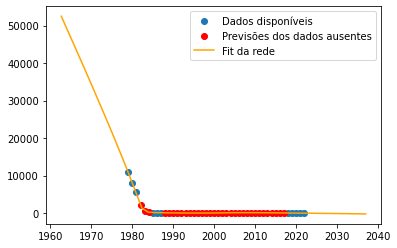

In [12]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*pesca_std + pesca_mean
prev_ausentes = model.predict(anos_para_prever_norm)*pesca_std + pesca_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,pesca,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*pesca_std + pesca_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

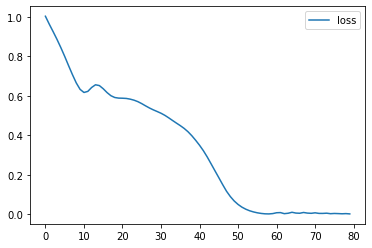

In [13]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [14]:
#Planilha com os dados preenchidos

df_previsoes = pd.DataFrame({'Ano':anos_para_prever, 'Oveva_ind':prev_ausentes.flatten()})

df_preenchido = pd.concat((dados,df_previsoes)).sort_values('Ano')

df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/Oveva/Interpolações Oveva_ind.xlsx')

df_preenchido

,Ano,Oveva_ind
29,1979,10847.000000
30,1980,7976.000000
31,1981,5712.000000
0,1982,2151.696045
1,1983,599.190918
2,1984,235.277954
35,1985,1.000000
36,1986,1.000000
37,1987,1.000000
3,1988,87.200928
